<center><h1><b>ENSEMBLE MODELS</b></h1></center>

---

# 00 - INTRODUCTION
**Ensemble models** are machine learning techniques that combine multiple models (or multiple instances of the same model) to achieve better predictive performance. This approach leverages the strengths of individual weak learners—which perform slightly better than random guessing—to construct a strong learner with significantly improved accuracy and robustness.

There are several types of ensemble methods:
* **Boosting**: Each model is trained sequentially, focusing on correcting the mistakes of its predecessors. Misclassified instances receive higher weights, making them more influential in subsequent training rounds.
  * Examples: AdaBoost, Gradient Boosting, XGBoost
* **Bagging** (Bootstrap Aggregating): Multiple models are trained in parallel on different subsets of the dataset (sampled with replacement). The final prediction is obtained by averaging the outputs (for regression) or using majority voting (for classification).
    * Examples: Random Forest
* **Stacking**: Unlike boosting and bagging, stacking can combine different types of models. The outputs of base models serve as inputs for a higher-level model, which learns the optimal way to aggregate their predictions.


#### WEAK LEARNER

A hypothesis class $H$ is considered a weak learner if, for any distribution of the training data, there exists a learning algorithm such that: $ L(h) < \frac{1}{2} - \epsilon $ where: $ L(h) $ is the error rate of the hypothesis $H$ and $ \epsilon > 0 $ is a small positive constant.

This means the model performs just slightly better than a coin flip (random guessing). While a weak learner alone is not very powerful, boosting algorithms can amplify its performance by combining many such learners.

Before exploring specific ensemble techniques, let's introduce a fundamental model frequently used as a weak learner in ensemble methods.

#### DECISION TREE
A **decision tree** is a model used for both classification and regression, structured in a tree-like hierarchy. It organizes and splits data recursively until a prediction is made. The simplest form of a decision tree is called a **decision stump**, which consists of a single root node and two leaf nodes (depth = 1). Despite its simplicity, it is frequently used in boosting algorithms like **AdaBoost** due to its fast training and low complexity.  
A tree with depth $d$ has a VC-dim = $2^d $, which gives an indication of its capacity to fit data. A decision tree predicts the output$y$ given an input $x \in X $ through a function$h:X \rightarrow Y$, following a top-down traversal of the tree structure.  

In this discussion, we will focus on **binary trees**, meaning the output is restricted to two possible classes: $y \in \{0,1\} $.

Decision trees are widely used due to their interpretability and ability to model non-linear decision boundaries. However, they are prone to overfitting, especially when grown to large depths, which is why they are often used within ensemble methods such as Random Forests and Boosting techniques.

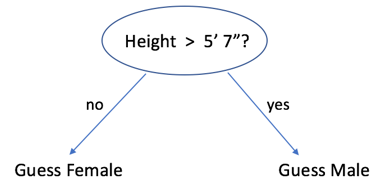

In [2]:
# EXAMPLE OF DECISION STUMP:
from IPython.display import Image, display
display(Image("./images/decision_stump.png", width=400))

#### ID3 ALGORITHM 

The **Iterative Dichotomizer 3 (ID3)** is a fundamental algorithm used to construct decision trees. It is a greedy, top-down algorithm that recursively partitions the dataset to create a tree structure. The main objective of ID3 is to maximize information gain at each step, ensuring that the data becomes purer as it progresses down the tree.  

The algorithm operates on:  
* A dataset $ S = \{(x_1, y_1), ..., (x_n, y_n)\} $, where each instance $ x_i $ consists of $ d $ attributes (=coordinates).  
* A splitting criterion to determine the best attribute for partitioning, such as:  
    - Training Error: measures the misclassification rate:  $ E = \frac{1}{m} \sum_{i=1}^{m} I(h(x_i) \neq y_i) $  
    - Gini Impurity: measures the probability of incorrect classification:  $ G = \sum_{c} p(i) (1 - p(i)) $  with $c$ number of classes, $p(i)$ probability of picking an element from class $i$.
    - Entropy: quantifies the disorder or uncertainty in the data: $ E = -\sum_{c} p(c) \log_2 p(c) $ . A higher entropy indicates greater impurity, meaning the data is more mixed. The goal of ID3 is to iteratively select the attribute that provides the greatest reduction in entropy, effectively making the data in each split more homogeneous. 

STEPS OF THE ALGORITHM:
1. Evaluate all attributes: Compute the information gain for each attribute (over all $m$ data points) and select the one that provides the best split as the root node.  
2. For each branch, repeat the process:  
   - Recompute the information gain for the remaining attributes.  
   - Select the best attribute as the next node in the tree.  
3. Stopping conditions:  
   - If all data points in a branch belong to the same class, stop splitting (this becomes a leaf node).  
   - If there are no more attributes left to split on, assign the majority class of the remaining samples to the node.  


#### PRO AND CONS:  
PRO:
- Produces an interpretable and transparent model.
- Efficient for datasets with categorical features.
- Works well when data has a clear hierarchical structure.

CONS: 
- Overfitting: Without pruning or stopping criteria, the tree can become too complex.  
- Sensitive to noisy data: Small changes in the dataset can result in large tree variations.  
- Biased toward attributes with many values: ID3 prefers attributes with more unique values, which may not always be ideal.  


---

# 1 - BOOSTING

Boosting is an ensemble learning technique that combines multiple weak learners to create a single, strong predictive model. It works by training models sequentially, where each new model focuses on correcting the errors made by the previous ones. Over time, the ensemble becomes more accurate by placing greater emphasis on difficult or misclassified examples.

Boosting is especially effective when weak learners are just slightly better than random guessing, yet when combined, their collective performance significantly improves.

Popular boosting algorithms include:
- AdaBoost (Adaptive Boosting)
- Gradient Boosting
- XGBoost (Extreme Gradient Boosting)

#### KEY IDEAS
- Models are trained **sequentially**, not in parallel.
- Each model attempts to **reduce the weighted error** of the previous ensemble.
- Data points that are hard to classify receive **higher weights** in subsequent iterations.
- Boosting can overfit if the base learners are too complex or if the model is not regularized properly.


---

## 1.1 ADABOOST
AdaBoost is one of the earliest and most popular boosting algorithms. It works by combining multiple decision stumps (weak learners), giving more focus to the data points that were misclassified in previous iterations. Over time, this adaptive process results in a highly accurate ensemble.

#### ALGORITHM:

1. Initialization:  
   Assign equal weight to all $m$ training samples:  $ w_i = \frac{1}{m}, \quad \text{for } i = 1, \dots, m $  
2. Train a weak learner:  
   Select the best attribute using a splitting criterion (e.g., information gain) and train a decision stump based on the current weighted dataset. Mathematically the weak learner is given by $h_t = sign(x- \theta) $, with $\theta$ being the found threshold.
3. Compute the weighted error of the weak learner: $ E_t = \sum_{i=1}^{m} w_i \cdot I(h_t(x_i) \neq y_i) $
   where $ h_t $ is the weak learner at iteration $ t $, and $ I(\cdot) $ is the indicator function.

4. Compute the learner’s influence (amount of say):  $ \alpha_t = \frac{1}{2} \log \left( \frac{1 - E_t}{E_t} \right) $.
   A lower error means a higher influence on the final prediction.

5. Update the weights of each training sample:
   $$ w_i^{(t+1)} = w_i^{(t)} \cdot \frac{ e^{-\alpha_t y_i h_t(x_i)} }{N} $$
   where $N= \sum_{i=1}^{m} w_{i}^{t+1}$ is used for normalization of weitghts. Misclassified points receive higher weights.

6. Repeat steps 2–5 for $T$ iterations, each time updating the sample weights and training a new weak learner. It is possible that the same weak learner is chosen multiple times.

7. Final predictor is a weighted majority vote (for classification). Given a sample $x$, its predicted class is given by  $  H(x) = \operatorname{sign} \left( \sum_{t=1}^{T} \alpha_t \cdot h_t(x) \right) $
   The sign function returns the final class label based on the sum of weighted predictions.

#### PRO AND CONS
PRO:
* Automatically focuses on hard examples  
* No need for parameter tuning in the base learner  
* Works well even with simple classifiers (e.g., decision stumps)  
* The final model is interpretable and sparse (only a few strong learners dominate)

CONS:
* Sensitive to noisy data and outliers  
* Requires careful choice of the number of iterations to avoid overfitting  
* Works best with weak learners that perform slightly better than random
